# Cross-Validation and Hyperparameter Optimization

This notebook demonstrates the use of cross-validation for model evaluation and random search for hyperparameter optimization.

## 1. Setup Environment

In [3]:
# Install required libraries
!pip install scikit-learn pandas numpy seaborn

## 2. Import Libraries


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 3. Load the Dataset


In [5]:
# Initialize the classifier models that will be used for the classification task.
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


## 4. Preprocess Data


In [7]:
# we don't need to split the data into a test set and a training set, this will be done by scikit learn k-fold function
X_train,y_train=X,y

## 5. Model Selection


In [13]:
# Initialize the classifier models that will be used for the classification task.
rf_model = RandomForestClassifier(random_state=1)
boost_model = AdaBoostClassifier(n_estimators=50, random_state=1)

## 6. Cross-Validation

Cross-validation is a technique used to assess the performance and generalizability of a machine learning model. It involves splitting the dataset into multiple subsets (folds), training the model on some folds, and testing it on the remaining fold. This process is repeated several times, each time using a different fold for testing and the rest for training. The results are then averaged to provide a more reliable estimate of the model's performance on unseen data.


In [14]:
# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print('All Random Forest scores:',cv_scores)
print(f'Random Forest Mean CV Score: {np.mean(cv_scores)}')
print(f'Random Forest CV Score: {np.std(cv_scores)}')

All Random Forest scores: [0.92982456 0.94736842 0.98245614 0.97368421 0.96460177]
Random Forest Mean CV Score: 0.9595870206489675
Random Forest CV Score: 0.01887841765073318


In [15]:
# Perform k-fold cross-validation
cv_scores = cross_val_score(boost_model, X_train, y_train, cv=5)
print('All Boosting scores:',cv_scores)
print(f'Boosting Mean CV Score: {np.mean(cv_scores)}')
print(f'Boosting std CV Score: {np.std(cv_scores)}')

All Boosting scores: [0.95614035 0.95614035 0.99122807 0.96491228 0.97345133]
Boosting Mean CV Score: 0.9683744760130415
Boosting std CV Score: 0.013110267873227947


Through cross-validation, we observe that Random Forest outperforms AdaBoost on certain training sets, but overall, AdaBoost appears to perform better on average. Therefore, we should choose AdaBoost as our model.

## 7. Hyperparameter Optimization

There are three main methods:

- **Grid Search**:  
Grid search is a hyperparameter optimization technique where a grid of possible hyperparameter values is defined, and all combinations are systematically tested. It helps identify the best set of hyperparameters but can be computationally intensive, particularly with large search spaces.

- **Random Search**:  
Random search selects hyperparameter combinations randomly from a predefined search space. It can be more efficient than grid search as it doesn't test all combinations and may find good configurations more quickly.

- **Bayesian Search**:  
Bayesian search utilizes probabilistic models to predict the most promising hyperparameters based on previous evaluations. It builds a model of the objective function and guides the search, often identifying optimal configurations with fewer evaluations than grid or random search.

We will use Grid Search to facilitate a clearer visualization of the hyperparameter space.

In [19]:
# Define hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': np.linspace(50, 200, 10).astype(int),
    'learning_rate': np.linspace(0.01, 2.0, 10)
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(boost_model, param_grid, cv=2) #set to 2-fold to save time
grid_search.fit(X_train, y_train)

# Print best parameters from grid search
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'learning_rate': 1.3366666666666667, 'n_estimators': 116}


## 8. Evaluate the Model
- Evaluate the best model found during the hyperparameter search on the test set and display the classification report and accuracy.

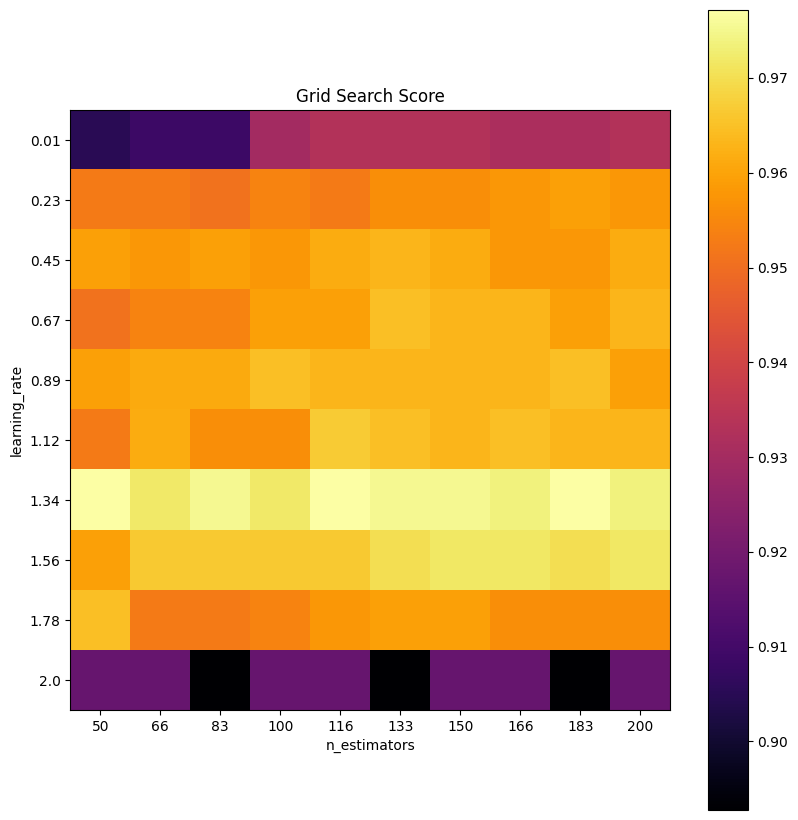

In [20]:

# Extract grid search results
results = grid_search.cv_results_

# Get unique parameters directly from the results
unique_n_estimators = np.round(np.unique(results['param_n_estimators']),2)
unique_learning_rates = np.round(np.unique(results['param_learning_rate']),2)

# Reshape mean test scores for heatmap
scores = results['mean_test_score'].reshape(len(unique_n_estimators), len(unique_learning_rates))
# Create a heatmap
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.inferno)
plt.xlabel('n_estimators')
plt.ylabel('learning_rate')
plt.colorbar()
plt.xticks(np.arange(len(unique_n_estimators)), unique_n_estimators)
plt.yticks(np.arange(len(unique_learning_rates)), unique_learning_rates)
plt.title('Grid Search Score')
plt.show()

### Conclusion

In this practical session, we examined the use of **cross-validation** and **hyperparameter optimization** with the **Breast Cancer dataset**.

**Cross-validation** showed that while **Random Forest** performed well in certain cases, **AdaBoost** exhibited superior average performance across the training sets.

Using **Grid Search**, we effectively identified the optimal **hyperparameters** for the AdaBoost classifier, improving its predictive capabilities. This process emphasized the importance of tuning for achieving the best results. Additionally, visualizing the score space could provide valuable insights into how different hyperparameter combinations affect model performance.

Although **Grid Search** was beneficial, it's important to mention that **Bayesian Search** might have been a more effective approach for hyperparameter tuning, potentially leading to even greater performance by more efficiently exploring the parameter space.

In conclusion, our findings suggest that **AdaBoost**, with its optimized parameters, offers an effective solution for **breast cancer diagnosis**.

